{'route': {'hasTollRoad': False, 'hasBridge': True, 'boundingBox': {'lr': {'lng': -76.612137, 'lat': 38.892063}, 'ul': {'lng': -77.019913, 'lat': 39.290443}}, 'distance': 38.089, 'hasTimedRestriction': False, 'hasTunnel': False, 'hasHighway': True, 'computedWaypoints': [], 'routeError': {'errorCode': -400, 'message': ''}, 'formattedTime': '00:49:29', 'sessionId': '5ecc230b-0188-6750-02b4-1828-1281a879d0ef', 'hasAccessRestriction': False, 'realTime': 2906, 'hasSeasonalClosure': False, 'hasCountryCross': False, 'fuelUsed': 1.65, 'legs': [{'hasTollRoad': False, 'hasBridge': True, 'destNarrative': 'Proceed to BALTIMORE, MD.', 'distance': 38.089, 'hasTimedRestriction': False, 'hasTunnel': False, 'hasHighway': True, 'index': 0, 'formattedTime': '00:49:29', 'origIndex': -1, 'hasAccessRestriction': False, 'hasSeasonalClosure': False, 'hasCountryCross': False, 'roadGradeStrategy': [[]], 'destIndex': 3, 'time': 2969, 'hasUnpaved': False, 'origNarrative': '', 'maneuvers': [{'distance': 0.792, 'st

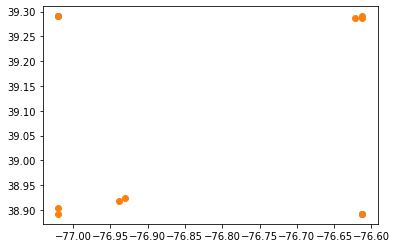

In [5]:
import urllib.parse
import requests
import json
import matplotlib.pyplot as pp


key = 

main_api = "https://www.mapquestapi.com/directions/v2/route?"
orig = "Washington"
dest = "Baltimaore"
url = main_api + urllib.parse.urlencode({"key": key, "from":orig, "to":dest})
json_data = requests.get(url).json()
print(json_data)

json_format = json.dumps(json_data)
print(json_format)
distance = json_data['route']['distance']
print(distance)

x = []
y = []
for loc in json_data['route']['boundingBox']:
  for key,val in json_data['route']['boundingBox'][loc].items():
    if key == 'lng':
      x.append(val)
    if key == 'lat':
      y.append(val)

print(pp.scatter(x,y))

# json_data['route']['legs'][0]['maneuvers'][i]['startPoint'] #i = 0 to 6

for i in range(len(json_data['route']['legs'][0]['maneuvers'])):
  for key,val in json_data['route']['legs'][0]['maneuvers'][i]['startPoint'].items():
    if key == 'lng':
      x.append(val)
    if key == 'lat':
      y.append(val)

print(pp.scatter(x,y))
    



In [0]:
json_status = json_data["info"]["statuscode"]
if json_status == 0:
  print("API Status: " + str(json_status) + " = A successful route call.\n")

API Status: 0 = A successful route call.



In [0]:
while True:
  orig = input("Starting Location: ")
  if orig == "quit" or orig == "q":
    break
  
  dest = input("Destination: ")
  if dest == "quit" or dest == "q":
    break

  url = main_api + urllib.parse.urlencode({"key": key, "from":orig, "to":dest})
  json_data = requests.get(url).json()
  print(json_data)

  json_format = json.dumps(json_data, indent=4)
  print(json_format)

Starting Location: Washington
Destination: New york
{'route': {'hasTollRoad': True, 'hasBridge': True, 'boundingBox': {'lr': {'lng': -74.002541, 'lat': 38.892063}, 'ul': {'lng': -77.019913, 'lat': 40.721645}}, 'distance': 224.699, 'hasTimedRestriction': False, 'hasTunnel': True, 'hasHighway': True, 'computedWaypoints': [], 'routeError': {'errorCode': -400, 'message': ''}, 'formattedTime': '04:00:17', 'sessionId': '5ecb8e42-0021-5f21-02b4-1a1a-02e9f358fc00', 'hasAccessRestriction': False, 'realTime': 13414, 'hasSeasonalClosure': False, 'hasCountryCross': False, 'fuelUsed': 9.93, 'legs': [{'hasTollRoad': True, 'hasBridge': True, 'destNarrative': 'Proceed to NEW YORK, NY.', 'distance': 224.699, 'hasTimedRestriction': False, 'hasTunnel': True, 'hasHighway': True, 'index': 0, 'formattedTime': '04:00:17', 'origIndex': -1, 'hasAccessRestriction': False, 'hasSeasonalClosure': False, 'hasCountryCross': False, 'roadGradeStrategy': [[]], 'destIndex': 12, 'time': 14417, 'hasUnpaved': False, 'origN

In [0]:
if json_status == 0:
  print("API Status: " + str(json_status) + " = A successful route call.\n")
  
  print("Directions from " + (orig) + " to " + (dest))
  print("Trip Duration: " + (json_data["route"]["formattedTime"]))
  print("Kilometers: " + str("{:.2f}".format((json_data["route"]["distance"])*1.61)))
  print("Fuel Used (Ltr): " + str("{:.2f}".format((json_data["route"]["fuelUsed"])*3.78)))
  print("=============================================")

  for each in json_data["route"]["legs"][0]["maneuvers"]:
    print((each["narrative"]) + " (" + str("{:.2f}".format((each["distance"])*1.61) + " km)"))
  
  print("=============================================\n")

elif json_status == 402:
  print("\n****************************************************************")
  print("Status Code: " + str(json_status) + "; Invalid user inputs forone or both locations.")
  print("****************************************************************\n")
else:
  print("\n************************************************************************")
  print("Status Code: " + str(json_status) + "; Refer to:")
  print("https://developer.mapquest.com/documentation/directions-api/status-codes")
  print("************************************************************************\n")

API Status: 0 = A successful route call.

Directions from Washington to Baltimaore
Trip Duration: 00:49:29
Kilometers: 61.32
Fuel Used (Ltr): 6.24
Start out going north on 6th St/US-50 E/US-1 N toward Pennsylvania Ave/US-1 Alt N. (1.28 km)
Turn right onto New York Ave/US-50 E. Continue to follow US-50 E (Crossing into Maryland). (7.51 km)
Take the Balt-Wash Parkway exit on the left toward Baltimore. (0.88 km)
Merge onto MD-295 N. (50.38 km)
Turn right onto W Pratt St. (0.86 km)
Turn left onto S Calvert St/MD-2. (0.43 km)
Welcome to BALTIMORE, MD. (0.00 km)



In [0]:
for loc in json_format['route']['boundingBox']:
  print(loc)

TypeError: ignored

In [0]:
import pyang

ModuleNotFoundError: ignored

In [0]:
!pip3 install pyang

     |████████████████████████████████| 583kB 5.0MB/s 


In [0]:
import pyang

In [0]:
dir(pyang)

['Context',
 'FileRepository',
 'Repository',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'error',
 'grammar',
 'io',
 'os',
 're',
 'statements',
 'string',
 'syntax',
 'sys',
 'types',
 'util',
 'xpath',
 'xpath_lexer',
 'xpath_parser',
 'xpath_parsetab',
 'yacc',
 'yang_parser',
 'yin_parser',
 'zlib']